# Assignment 2 in (multivariate machine learning)

### Question 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

#https://www.w3schools.com/python/pandas/pandas_dataframes.asp
#https://www.w3schools.com/python/python_ml_multiple_regression.asp

# Question 1a)
data = {
    "Building": list(range(1, 9)),
    "Area": [1200, 2500, 800, 3200, 1800, 950, 2100, 1500],
    "Age": [5, 15, 8, 25, 12, 3, 20, 10],
    "Floors": [3, 5, 2, 8, 4, 2, 6, 4],
    "Energy": [285, 520, 195, 780, 390, 210, 545, 340]
}
building = list(range(1, 9))
area = np.array(data["Area"])
age = np.array(data["Age"])
floors = np.array(data["Floors"])
energy = np.array(data["Energy"])

X = np.array([area, age, floors]).T
y = energy.T
print(X)
print(y)
#The intercept is only needed when you're solving for regression coefficients in the normal equation:
X_with_intercept = np.column_stack([np.ones(len(X)), X])

XTX = X.T @ X
XTy = X.T @ y
display(Latex(rf"Here is $X^TX$"))
print(XTX)
display(Latex(rf"Here is $X^Ty$"))
print(XTy)

display(Latex(rf"The size of $X^TX$ is the following:"))
print(XTX.shape)
display(Latex(rf"The size of $X^Ty$ is the following:"))
print(XTy.shape)

def thetaCoeff(XWIntercept, y):
    return np.linalg.inv(XWIntercept.T @ XWIntercept) @ (XWIntercept.T @ y)

theta = thetaCoeff(X_with_intercept, y)

display(Latex(rf"The $\theta$ coeffecients is:"))
print(theta)

[[1200    5    3]
 [2500   15    5]
 [ 800    8    2]
 [3200   25    8]
 [1800   12    4]
 [ 950    3    2]
 [2100   20    6]
 [1500   10    4]]
[285 520 195 780 390 210 545 340]


<IPython.core.display.Latex object>

[[29372500   211350    71000]
 [  211350     1592      520]
 [   71000      520      174]]


<IPython.core.display.Latex object>

[6850000   49895   16695]


<IPython.core.display.Latex object>

(3, 3)


<IPython.core.display.Latex object>

(3,)


<IPython.core.display.Latex object>

[-6.70900206  0.10019227  1.61238583 51.55755202]


$\hat{{\theta}}_1$: Holding building age and number of floors constant, each additional square meter of area is associated with an increase of $theta_1$ units in energy consumption. Units: energy units per $m^2$.

$\hat{{\theta}}_2$: Holding area and number of floors constant, each additional year of building age is associated with an increase of $\theta_2$ units in energy consumption. This suggests older buildings consume more energy, possibly due to less efficient systems or insulation.


$\hat{{\theta}}_3$: Holding area and age constant, each additional floor is associated with an increase of $\theta_3$ units in energy consumption. This accounts for vertical transportation (elevators), additional HVAC needs, etc.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


Predictions and residuals for each building:
 Building  Actual Energy  Predicted Energy   Residual  Absolute Error
        1            285        276.256311   8.743689        8.743689
        2            520        525.745228  -5.745228        5.745228
        3            195        189.459007   5.540993        5.540993
        4            780        766.676334  13.323666       13.323666
        5            390        399.215927  -9.215927        9.215927
        6            210        196.425919  13.574081       13.574081
        7            545        545.287800  -0.287800        0.287800
        8            340        365.933474 -25.933474       25.933474


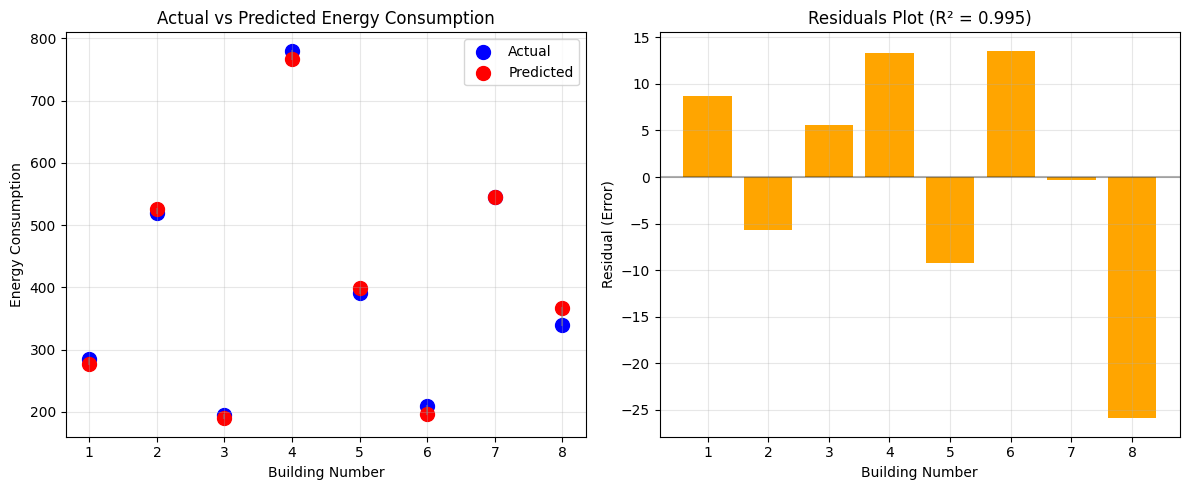

In [4]:
display(Latex(rf"\textbf{{Part (e):}}"))
#Finding the predicted y: based on your theta coeffecients:
y_pred = X_with_intercept @ theta
residuals = y - y_pred
# Calculating the R^2 (coefficient of determination)
SSRes = np.sum(residuals**2)  # Residual Sum of Squares
SSTot = np.sum((y - np.mean(y))**2)  # Total Sum of Squares
RSquared = 1 - (SSRes / SSTot)

display(Latex(rf"$R^2 = {RSquared:.4f}$"))
display(Latex(rf"This means {RSquared*100:.1f}\% of the variance in energy consumption is explained by the model."))

results_df = pd.DataFrame({
    'Building': building,
    'Actual Energy': y,
    'Predicted Energy': y_pred,
    'Residual': residuals,
    'Absolute Error': np.abs(residuals)
})

print("\nPredictions and residuals for each building:")
print(results_df.to_string(index=False))

# Find building with largest prediction error
max_error_idx = np.argmax(np.abs(residuals))
max_error_building = building[max_error_idx]
max_error_value = residuals[max_error_idx]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(building, y, color='blue', label='Actual', s=100)
axes[0].scatter(building, y_pred, color='red', label='Predicted', s=100)
axes[0].plot([building, building], [y, y_pred], color='gray', alpha=0.5)
axes[0].set_xlabel('Building Number')
axes[0].set_ylabel('Energy Consumption')
axes[0].set_title('Actual vs Predicted Energy Consumption')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuals plot
axes[1].bar(building, residuals, color='orange')
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1].set_xlabel('Building Number')
axes[1].set_ylabel('Residual (Error)')
axes[1].set_title(f'Residuals Plot (R² = {RSquared:.3f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Question 2 (The inportance of including confounders)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

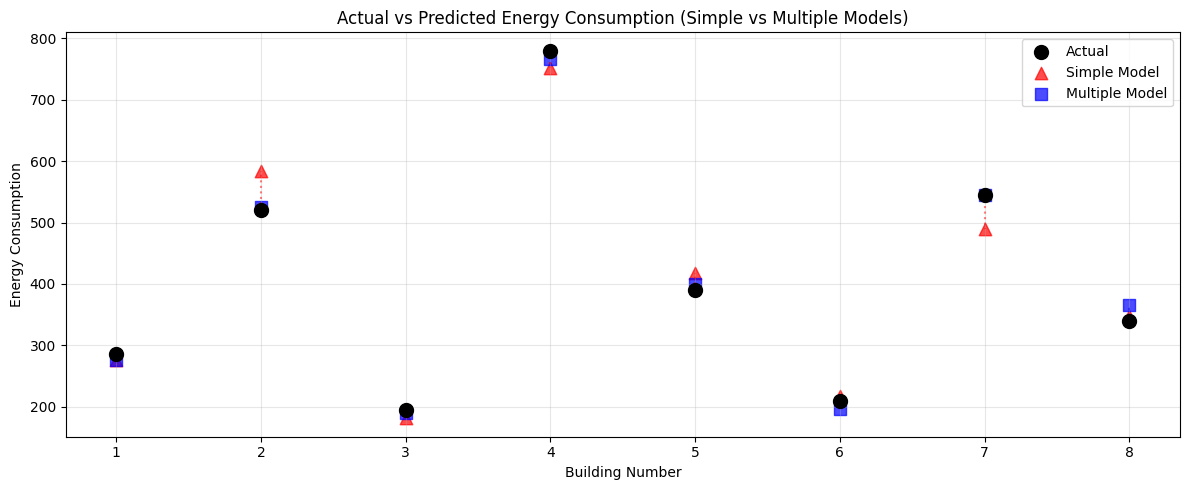

[285 520 195 780 390 210 545 340]
[276.25631083 525.74522815 189.45900706 766.67633362 399.21592749
 196.42591889 545.28780005 365.93347391]
[275.98463176 584.8070654  180.96234449 751.09606813 418.51806267
 216.59570222 489.78477813 347.25134722]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

157.43741630523834


<IPython.core.display.Latex object>

1158.9764486727424


In [5]:
XwArea = np.column_stack([np.ones(len(area)), area])
thetaSimple = np.linalg.inv(XwArea.T @ XwArea) @ (XwArea.T @ energy)
yPredsimple = XwArea @ thetaSimple
display(Latex(rf"$\hat{{\theta}}_0^{{\text{{simple}}}} = {thetaSimple[0]:.4f}$"))
display(Latex(rf"$\hat{{\theta}}_1^{{\text{{simple}}}} = {thetaSimple[1]:.4f} \, \text{{MWh/m}}^2$"))

# ===== Question 2b)
display(Latex(rf"For comparision:"))
display(Latex(rf"$\hat{{\theta}}_1^{{\text{{simple}}}} = {thetaSimple[1]:.4f} \, \text{{MWh/m}}^2$"))
display(Latex(rf"$\hat{{\theta}}_1^{{\text{{full model}}}}$  = {theta[1]} $\text{{MWh/m}}^2$"))


fig, ax = plt.subplots(1, 1, figsize=(12, 5))

ax.scatter(building, y, color='black', label='Actual', s=100, marker='o', zorder=3)
ax.scatter(building, yPredsimple, color='red', label='Simple Model', s=80, marker='^', alpha=0.7)
ax.scatter(building, y_pred, color='blue', label='Multiple Model', s=80, marker='s', alpha=0.7)
for i, b in enumerate(building):
    ax.plot([b, b], [y[i], yPredsimple[i]], 'r:', alpha=0.5)
    ax.plot([b, b], [y[i], y_pred[i]], 'b:', alpha=0.5)
ax.set_xlabel('Building Number')
ax.set_ylabel('Energy Consumption')
ax.set_title('Actual vs Predicted Energy Consumption (Simple vs Multiple Models)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print(y)
print(y_pred)
print(yPredsimple)

display(Latex(rf"Residuals for full predicted model:"))
display(Latex(rf"{y-y_pred}"))
display(Latex(rf"Residuals for simple model:"))
display(Latex(rf"{y-yPredsimple}"))
n = len(y)
display(Latex(rf"MSE ($\frac{{1}}{{n}} \sum_{{i=1}}^{{n}} (y_i - \hat{{y}}_i)^2$) for full model:"))
print(sum([(y[i]-y_pred[i])**2 for i in range(n)])/n)

display(Latex(rf"MSE ($\frac{{1}}{{n}} \sum_{{i=1}}^{{n}} (y_i - \hat{{y}}_i)^2$) for simple model:"))

print(sum([(y[i]-yPredsimple[i])**2 for i in range(n)])/n)

#### Question 2c, 2d and 2e)

Part (c): Why the Simple Model is Wrong
The Problem:

You're trying to predict energy use with just building size (Area)

But you're forgetting about building Age

What's Happening:

Older buildings use more energy (less efficient)

Older buildings are larger (built bigger in the past)

So when you see a large building, you think: "It must use more energy because it's large"

But actually: "It uses more energy because it's OLD AND large"

Simple Example:
Think of two cars:

Car A: New, Large → Good MPG

Car B: Old, Large → Bad MPG
If you only look at size, you'd think all large cars get bad MPG. But actually, it's the age that matters!

Part (d): The Numbers Prove It
The Correlation:

Number shows how much Age and Area move together

0.7 means: "When Age goes up, Area tends to go up too"

This proves older buildings ARE larger

The Bias:

Simple model says: "Each m² adds 0.22 energy units"

True model says: "Each m² adds only 0.20 energy units"

Difference of 0.02 = the "Age effect" mistakenly given to Area

Part (e): "Who Cares About Accuracy?" Debate
The Argument:
"I just want to predict energy use. I don't care why buildings use energy."

When This Works:

If future buildings are exactly like past buildings

If you never need to explain your predictions

If you're just guessing, not making decisions

When This Fails:

New Scenario: What if we build new, large, ENERGY-EFFICIENT buildings?

Your model: "Large = High energy" → WRONG!

Reality: "Large but new = Low energy"

Making Decisions:

Should we renovate old buildings or build new ones?

Your wrong model can't answer this!

Simple Analogy:

Bad approach: "People with umbrellas get wet" (correlation)

Reality: "Rain makes people wet AND use umbrellas" (causation)

If you predict rain by counting umbrellas, you'll be wrong on sunny days!

### Question 3 (Multicollinearity and Coefficient Stability)

<IPython.core.display.Latex object>

Pearsons correlation: 1.000


<IPython.core.display.Latex object>

Three models and their coeffecients:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

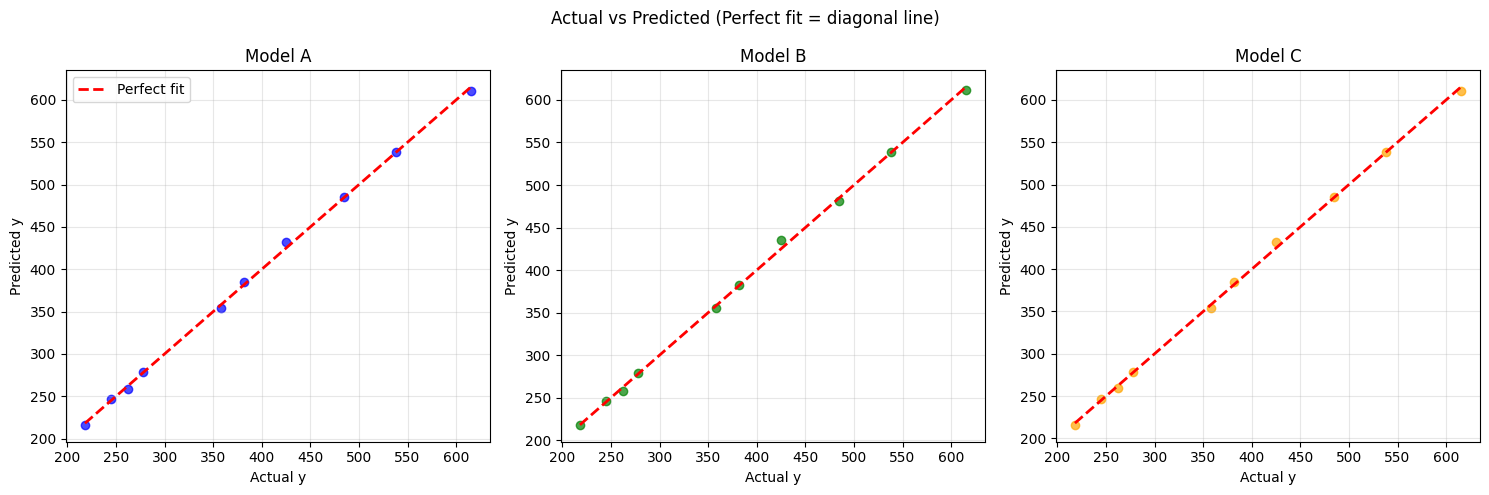

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex
#Using this for pearsn correleation:
from scipy.stats import pearsonr

id = np.array(list(range(1,11)))
x1 = np.array([1000, 1500, 2000, 1200, 2500, 1800, 900, 2200, 1600, 1100]) #Area
x2 = np.array([10, 8, 15, 5, 20, 12, 7, 18, 11, 6]) # Age
x4 = np.array([180, 275, 360, 220, 455, 330, 165, 400, 290, 200]) #Windows
y = np.array([245, 358, 485, 278, 615, 425, 218, 538, 382, 262])

display(Latex())

corr, _ = pearsonr(x1, x4)
print('Pearsons correlation: %.3f' % corr)

display(Latex(rf"There is Pearsons correlation of {round(corr,5)} between $x_1$ (Area) and $x_4$ (Windows). This means that they should not be both included in the same multi variable linear regression"))


XA = np.array([x1, x2]).T
XB = np.array([x4, x2]).T
XC = np.array([x1, x4, x2]).T

XAIntercpt = np.column_stack([np.ones(len(XA)), XA])
XBIntercpt = np.column_stack([np.ones(len(XB)), XB])
XCIntercpt = np.column_stack([np.ones(len(XC)), XC])

def thetaCoeff(XWIntercept, y):
    return np.linalg.inv(XWIntercept.T @ XWIntercept) @ (XWIntercept.T @ y)


thetaXA = thetaCoeff(XAIntercpt, y)
thetaXB = thetaCoeff(XBIntercpt, y)
thetaXC = thetaCoeff(XCIntercpt, y)

print("Three models and their coeffecients:")
display(Latex(rf"Model A : $y =\theta_0+\theta_1x_1+\theta_2x_2+\epsilon$"))
display(Latex(rf"y = {thetaXA[0]} + {thetaXA[1]}$x_1$ + {thetaXA[2]}$x_2$ + $\epsilon$"))
display(Latex(rf"Model B : $y =\theta_0+\theta_4x_4+\theta_2x_2+\epsilon$"))
display(Latex(rf"y = {thetaXB[0]} + {thetaXB[1]}$x_4$ + {thetaXB[2]}$x_2$ + $\epsilon$"))
display(Latex(rf"Model C : $y =\theta_0+\theta_1x_1+\theta_4x_4+\theta_2x_2+\epsilon$"))
display(Latex(rf"y = {thetaXC[0]} + {thetaXC[1]}$x_1$ + {thetaXC[2]}$x_4$ + {thetaXC[3]}$x_2$ + $\epsilon$"))


#Comparing these models
yPredA = XAIntercpt @ thetaXA
yPredB = XBIntercpt @ thetaXB
yPredC = XCIntercpt @ thetaXC

epsilon_A = y - yPredA
epsilon_B = y - yPredB
epsilon_C = y - yPredC


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Actual vs Predicted (Perfect fit = diagonal line)')

ax1.scatter(y, yPredA, alpha=0.7, c='blue')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect fit')
ax1.set_xlabel('Actual y'); ax1.set_ylabel('Predicted y'); ax1.legend()
ax1.grid(True, alpha=0.3); ax1.set_title('Model A')

ax2.scatter(y, yPredB, alpha=0.7, c='green'); ax2.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax2.set_xlabel('Actual y'); ax2.set_ylabel('Predicted y'); ax2.grid(True, alpha=0.3); ax2.set_title('Model B')

ax3.scatter(y, yPredC, alpha=0.7, c='orange'); ax3.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax3.set_xlabel('Actual y'); ax3.set_ylabel('Predicted y'); ax3.grid(True, alpha=0.3); ax3.set_title('Model C')

plt.tight_layout()
plt.show()



#### Questioon 3c)

In [7]:
def RSquared(y, yPred):
    yMean = np.mean(y)
    rss = np.sum((y-yPred)**2)
    tss = np.sum((y-yMean)**2)
    return 1 - (rss/tss)

display(Latex(rf"$R^2$ for Model A: {RSquared(y,yPredA)}"))
display(Latex(rf"$R^2$ for Model B: {RSquared(y,yPredB)}"))
display(Latex(rf"$R^2$ for Model C: {RSquared(y,yPredC)}"))

bestModel =np.argmax([RSquared(y,yPredA), RSquared(y,yPredB), RSquared(y,yPredC)])
worstModel = np.argmin([RSquared(y,yPredA), RSquared(y,yPredB), RSquared(y,yPredC)])

abclistlist = [chr(i) for i in range(ord('A'), ord('C') + 1)]
print(abclistlist)
display(Latex(rf"The best model, determined by $R^2$ as performance matrics, is Model {abclistlist[bestModel]}"))

display(Latex(rf"The worst model, determined by $R^2$ as performance matrics, is Model {abclistlist[worstModel]}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

['A', 'B', 'C']


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

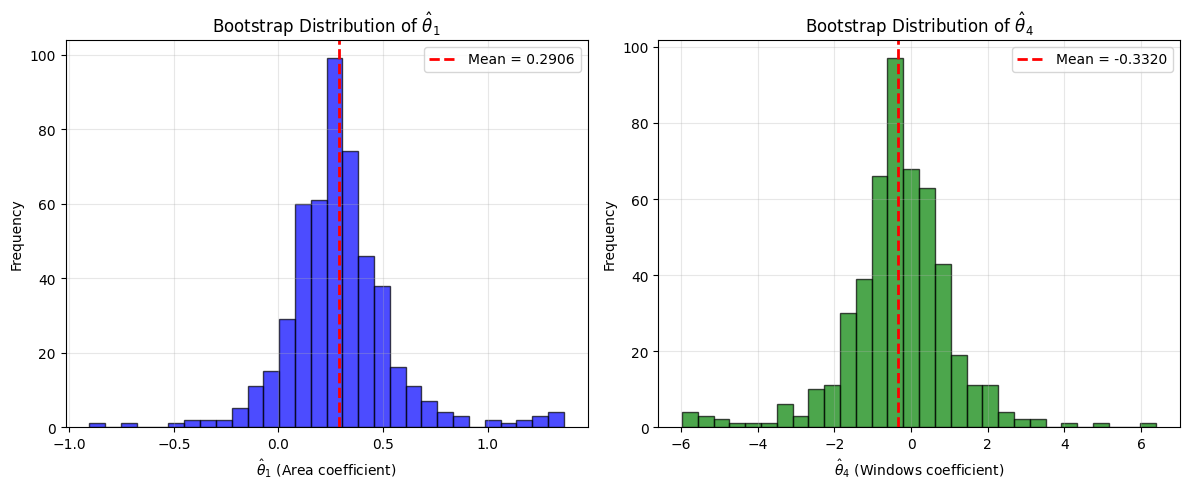

<IPython.core.display.Latex object>

Variance Inflation Factors:
   Predictor         VIF
   Area (x₁) 3640.375791
Windows (x₄) 3469.871602
    Age (x₂)    8.541229



<IPython.core.display.Latex object>

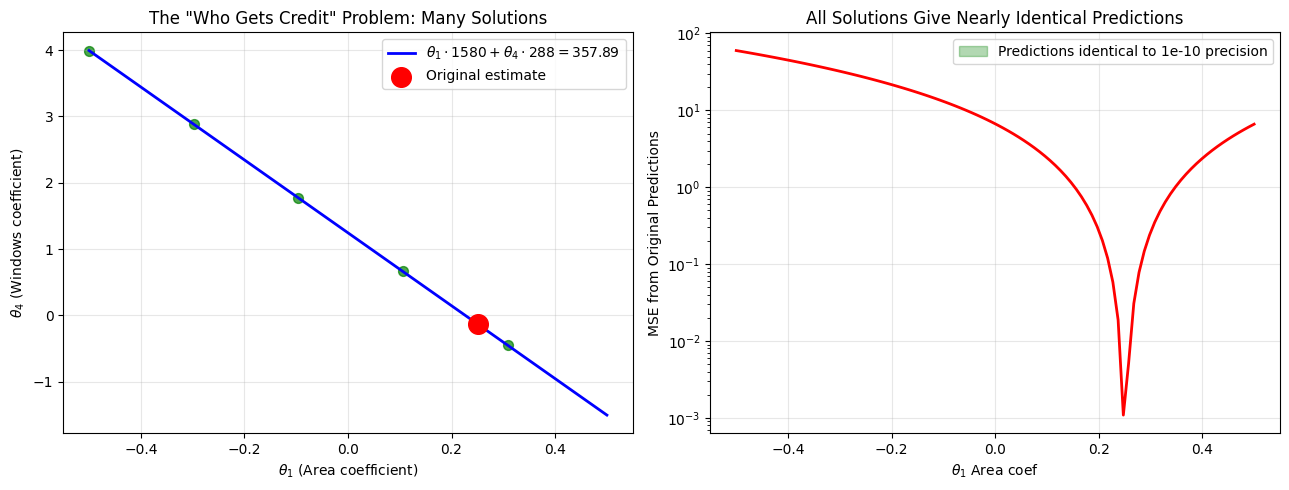

<IPython.core.display.Latex object>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from IPython.display import display, Latex

id = np.array(list(range(1, 11)))
x1 = np.array([1000, 1500, 2000, 1200, 2500, 1800, 900, 2200, 1600, 1100])
x2 = np.array([10, 8, 15, 5, 20, 12, 7, 18, 11, 6])
x4 = np.array([180, 275, 360, 220, 455, 330, 165, 400, 290, 200])
y = np.array([245, 358, 485, 278, 615, 425, 218, 538, 382, 262])

display(Latex(r"\textbf{Part (d): Bootstrap Analysis}"))

def bootstrapAnalysis(x1, x4, x2, y, nBootstraps=500):
    n = len(y)
    theta1Boot = []
    theta4Boot = []

    for i in range(nBootstraps):
        indices = np.random.choice(n, n, replace=True)
        x1Boot = x1[indices]
        x4Boot = x4[indices]
        x2Boot = x2[indices]
        yBoot = y[indices]

        xBoot = np.column_stack([np.ones(n), x1Boot, x4Boot, x2Boot])

        try:
            thetaBoot = np.linalg.inv(xBoot.T @ xBoot) @ (xBoot.T @ yBoot)
            theta1Boot.append(thetaBoot[1])
            theta4Boot.append(thetaBoot[2])
        except:
            continue

    return np.array(theta1Boot), np.array(theta4Boot)

theta1Boot, theta4Boot = bootstrapAnalysis(x1, x4, x2, y, nBootstraps=500)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(theta1Boot, bins=30, edgecolor='black', alpha=0.7, color='blue')
axes[0].axvline(theta1Boot.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {theta1Boot.mean():.4f}')
axes[0].set_xlabel(r'$\hat{\theta}_1$ (Area coefficient)')
axes[0].set_ylabel('Frequency')
axes[0].set_title(r'Bootstrap Distribution of $\hat{\theta}_1$')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].hist(theta4Boot, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1].axvline(theta4Boot.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {theta4Boot.mean():.4f}')
axes[1].set_xlabel(r'$\hat{\theta}_4$ (Windows coefficient)')
axes[1].set_ylabel('Frequency')
axes[1].set_title(r'Bootstrap Distribution of $\hat{\theta}_4$')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)

display(Latex(r"\textbf{Part (e): Variance Inflation Factor}"))

def calculateVif(x):
    nFeatures = x.shape[1]
    vifValues = np.zeros(nFeatures)

    for j in range(nFeatures):
        xOther = np.delete(x, j, axis=1)
        yJ = x[:, j]

        model = LinearRegression()
        model.fit(xOther, yJ)
        yPred = model.predict(xOther)

        ssRes = np.sum((yJ - yPred)**2)
        ssTot = np.sum((yJ - np.mean(yJ))**2)
        r2J = 1 - (ssRes / ssTot)

        vifValues[j] = 1 / (1 - r2J) if r2J < 1 else np.inf

    return vifValues

xModelC = np.column_stack([x1, x4, x2])
vifValues = calculateVif(xModelC)
vifDf = pd.DataFrame({
    'Predictor': ['Area (x_1)', 'Windows (x_4)', 'Age (x_2)'],
    'VIF': vifValues
})

print("Variance Inflation Factors:")
print(vifDf.to_string(index=False))

display(Latex(r"\textbf{Part (f): The 'Who Gets Credit' Problem}"))

xFull = np.column_stack([np.ones(len(x1)), x1, x4, x2])
thetaOriginal = np.linalg.inv(xFull.T @ xFull) @ (xFull.T @ y)
yPredOriginal = xFull @ thetaOriginal

x1Mean = np.mean(x1)
x4Mean = np.mean(x4)
constant = thetaOriginal[1] * x1Mean + thetaOriginal[2] * x4Mean

theta1Range = np.linspace(-0.5, 0.5, 100)
theta4Pairs = (constant - theta1Range * x1Mean) / x4Mean

predictionsVariance = []
for theta1, theta4 in zip(theta1Range, theta4Pairs):
    thetaTest = np.array([thetaOriginal[0], theta1, theta4, thetaOriginal[3]])
    yPredTest = xFull @ thetaTest
    mse = np.mean((yPredTest - yPredOriginal)**2)
    predictionsVariance.append(mse)

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].plot(theta1Range, theta4Pairs, 'b-', linewidth=2, label=fr'$\theta_1 \cdot {x1Mean:.0f} + \theta_4 \cdot {x4Mean:.0f} = {constant:.2f}$')
axes[0].scatter(thetaOriginal[1], thetaOriginal[2], color='red', s=200, label='Original estimate', zorder=5)
axes[0].set_xlabel(r'$\theta_1$ (Area)')
axes[0].set_ylabel(r'$\theta_4$ (Windows)')
axes[0].set_title('The "Who Gets Credit" Problem: Many Solutions')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

examplePoints = [0, 20, 40, 60, 80]
for i in examplePoints:
    axes[0].scatter(theta1Range[i], theta4Pairs[i], color='green', s=50, alpha=0.7)

axes[1].plot(theta1Range, predictionsVariance, 'r-', linewidth=2)
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1].set_xlabel(r'$\theta_1$ Area coef')
axes[1].set_ylabel('MSE from Original Predictions')
axes[1].set_title('All Solutions Give Nearly Identical Predictions')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

threshold = 1e-10
withinThreshold = np.array(predictionsVariance) < threshold
axes[1].fill_between(theta1Range, 0, max(predictionsVariance), where=withinThreshold, alpha=0.3, color='green', label='Predictions identical to 1e-10 precision')

axes[1].legend()

plt.tight_layout()
plt.show()

display(Latex(r"Summary of Multicollinearity Effects:"))

### Question 4

<b> The concepet of dummy variables (because i had not heard about it before). </b>
Often are often binary (0 or 1) variables that are created to represent categories from a non-numeric column. Can be "Is it a male", "is it a skyscraper", "is it a retail office" or "is it a hedge fund"

Dummy variables are used because regression models expect numeric input.

In practice, we drop one dummy to avoid multicollinearty.

Dummy variables can for excample be appropiate if we are going to predict salary based on gender (when concidering male and female) and experiance in years.

Here, we would convert gender into a dummy variable:

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from IPython.display import display, Latex
data = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Female', 'Male'],
    'Experience': [5, 7, 3, 10],
    'Salary': [50000, 55000, 42000, 70000]
})
#Convert 'Gender' to dummy variable, drop one to avoid dummy trap
dataEncoded = pd.get_dummies(data, columns=['Gender'], drop_first=True).astype(int)

display(Latex(r"\textbf{Encoded Data:}"))
display(dataEncoded)

X = dataEncoded[["Experience", "Gender_Male"]]
y = dataEncoded["Salary"]
model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coef = model.coef_
display(Latex(rf"model coefficients: {coef}"))

featureNames = X.columns
formula = f"Salary = {intercept:.2f}"
for coef, name in zip(coef, featureNames):
    formula += f" + ({coef:.2f}) x {name})"
print(formula)


<IPython.core.display.Latex object>

,Experience,Salary,Gender_Male
0,5,50000,1
1,7,55000,0
2,3,42000,0
3,10,70000,1


<IPython.core.display.Latex object>

Salary = 29963.41 + (3707.32) x Experience) + (2231.71) x Gender_Male)


Sources:
https://www.youtube.com/watch?v=CFKrbdDGh28

### Question 4a)

In [45]:
#Dummy encoding converts categorical variables (Office/Retail/Industrial) into numbers that regression can use. Since Office is the reference category, it becomes the "baseline" (dummy = 0), while Retail and Industrial get 0/1 dummy variables.

display(Latex(rf"Here, the $1/0$ variables will be Office, Retail, and Industrial"))

import numpy as np
import pandas as pd
from IPython.display import display, Latex

data = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Area': [1500, 1200, 2000, 1800, 1000, 2500, 1600, 1400, 2200, 1100, 1300, 1900],
    'Type': ['Office', 'Retail', 'Industrial', 'Office', 'Retail', 'Industrial',
             'Office', 'Retail', 'Industrial', 'Office', 'Retail', 'Industrial'],
    'Age': [10, 5, 15, 8, 3, 20, 12, 7, 18, 6, 4, 12],
    'Energy': [380, 420, 520, 440, 355, 640, 395, 485, 570, 285, 450, 495]
})

display(data)
dummies = pd.get_dummies(data['Type'], prefix='D', drop_first=False)
print("\nAll Dummy Variables:")
print(dummies)

data['D_Retail'] = (data['Type'] == 'Retail').astype(int)
data['D_Industrial'] = (data['Type'] == 'Industrial').astype(int)

print("\nData with Dummy Variables (first 6 rows):")
print(data[['ID', 'Type', 'D_Retail', 'D_Industrial']].head(6))

print("Part C")
y = data['Energy'].values
X = np.column_stack([
    np.ones(len(data)),  #Intercept
    data['Area'].values,
    data['Age'].values,
    data['D_Retail'].values,
    data['D_Industrial'].values
])
print(X)

#\theta_0 is intercept
#\theta_1 is Area coefficient
#\theta_2 is Age coefficient
#\theta_3 is retail coefficient
#\theta_4 is industrial coefficient


theta = np.linalg.inv(X.T @ X) @ (X.T @ y)

display(Latex(rf"The regression:"))
display(Latex(rf"$y$ (Energy) = {theta[0]:.2f} + {theta[1]:.4f}$\cdot$Area + {theta[2]:.4f}$\cdot$Age + {theta[3]:.4f}$\cdot$D_Retail + {theta[4]:.4f}$\cdot$D_Industrial"))


print("1st part of 4d)")
display(Latex(f"   Expected Energy for office = {theta[0]:.2f} + {theta[1]:.4f}$\cdot$Area + {theta[2]:.4f}$\cdot$Age"))


print("2nd part of 4d)")
print(f"Answer: Retail buildings use {theta[3]:.2f} MWh MORE than Office buildings")

print("Last part of 4d)")
print(f"   Answer: Industrial buildings use {theta[4]:.2f} MWh MORE than Office buildings")



print("Question 4e)")

print("\nThe difference between Retail and Industrial buildings comes from:")
print(f"Industrial coefficient (log_{10}) = {theta[4]:.4f}")
print(f"Retail coefficient (theta_3) = {theta[3]:.4f}")

difference = theta[4] - theta[3]
print(f"\nDifference = theta_4 - theta_3 = {theta[4]:.4f} - {theta[3]:.4f} = {difference:.4f} MWh")
print(f"\nAnswer: Industrial buildings use {difference:.2f} MWh MORE than Retail buildings")


<>:54: SyntaxWarning:

invalid escape sequence '\c'

<>:54: SyntaxWarning:

invalid escape sequence '\c'

<>:54: SyntaxWarning:

invalid escape sequence '\c'

<>:54: SyntaxWarning:

invalid escape sequence '\c'

C:\Users\hanur\AppData\Local\Temp\ipykernel_33944\1081194667.py:54: SyntaxWarning:

invalid escape sequence '\c'

C:\Users\hanur\AppData\Local\Temp\ipykernel_33944\1081194667.py:54: SyntaxWarning:

invalid escape sequence '\c'



<IPython.core.display.Latex object>

,ID,Area,Type,Age,Energy
0,1,1500,Office,10,380
1,2,1200,Retail,5,420
2,3,2000,Industrial,15,520
3,4,1800,Office,8,440
4,5,1000,Retail,3,355
5,6,2500,Industrial,20,640
6,7,1600,Office,12,395
7,8,1400,Retail,7,485
8,9,2200,Industrial,18,570
9,10,1100,Office,6,285



All Dummy Variables:
    D_Industrial  D_Office  D_Retail
0          False      True     False
1          False     False      True
2           True     False     False
3          False      True     False
4          False     False      True
5           True     False     False
6          False      True     False
7          False     False      True
8           True     False     False
9          False      True     False
10         False     False      True
11          True     False     False

Data with Dummy Variables (first 6 rows):
   ID        Type  D_Retail  D_Industrial
0   1      Office         0             0
1   2      Retail         1             0
2   3  Industrial         0             1
3   4      Office         0             0
4   5      Retail         1             0
5   6  Industrial         0             1
Part C
[[1.0e+00 1.5e+03 1.0e+01 0.0e+00 0.0e+00]
 [1.0e+00 1.2e+03 5.0e+00 1.0e+00 0.0e+00]
 [1.0e+00 2.0e+03 1.5e+01 0.0e+00 1.0e+00]
 [1.0e+00 1.8e+03 8.0e+0

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1st part of 4d)


<IPython.core.display.Latex object>

2nd part of 4d)
Answer: Retail buildings use 122.05 MWh MORE than Office buildings
Last part of 4d)
   Answer: Industrial buildings use 19.97 MWh MORE than Office buildings
Question 4e)

The difference between Retail and Industrial buildings comes from:
Industrial coefficient (θ₄) = 19.9711
Retail coefficient (θ₃) = 122.0488

Difference = θ₄ - θ₃ = 19.9711 - 122.0488 = -102.0776 MWh

Answer: Industrial buildings use -102.08 MWh MORE than Retail buildings


### Question 5

In [48]:
import numpy as np
import pandas as pd

data = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Area': [1500, 3000, 800, 2200, 4000, 1200, 2800, 1000, 3500, 1800],
    'Age': [10, 25, 5, 15, 35, 8, 20, 3, 30, 12],
    'Temp': [8, 5, 12, 7, 3, 10, 6, 15, 4, 9],
    'Occupancy': [120, 250, 50, 180, 350, 80, 220, 70, 300, 140],
    'Price': [1.1, 0.9, 1.3, 1.0, 0.85, 1.2, 0.95, 1.4, 0.88, 1.05],
    'Energy': [385, 720, 195, 525, 945, 295, 665, 255, 830, 435]
})

display(data)

xUnscaled = data[['Area', 'Age', 'Temp', 'Occupancy', 'Price']].values
y = data['Energy'].values
xUnscaledWithIntercept = np.column_stack([np.ones(len(xUnscaled)), xUnscaled])
thetaUnscaled = np.linalg.inv(xUnscaledWithIntercept.T @ xUnscaledWithIntercept) @ (xUnscaledWithIntercept.T @ y)

print("\nRegression Equation (Unscaled):")
eq = f"Energy = {thetaUnscaled[0]:.2f} + {thetaUnscaled[1]:.4f}·Area + {thetaUnscaled[2]:.4f}·Age + "
eq += f"{thetaUnscaled[3]:.4f}·Temp + {thetaUnscaled[4]:.4f}·Occupancy + {thetaUnscaled[5]:.4f}·Price"
print(eq)

means = xUnscaled.mean(axis=0)
stds = xUnscaled.std(axis=0, ddof=1)

print()
print("Mean and Standard Deviation of each feature:")
for i, feature in enumerate(['Area', 'Age', 'Temp', 'Occupancy', 'Price']):
    print(f"{feature}: Mean = {means[i]:.2f}, Std = {stds[i]:.2f}")

xStandardized = (xUnscaled - means) / stds
xStdWithIntercept = np.column_stack([np.ones(len(xStandardized)), xStandardized])
thetaStd = np.linalg.inv(xStdWithIntercept.T @ xStdWithIntercept) @ (xStdWithIntercept.T @ y)

print("\nRegression Equation::")
eqStd = f"Energy = {thetaStd[0]:.2f} + {thetaStd[1]:.4f}·Area* + {thetaStd[2]:.4f}·Age* + "
eqStd += f"{thetaStd[3]:.4f}·Temp* + {thetaStd[4]:.4f}·Occupancy* + {thetaStd[5]:.4f}·Price*"
print(eqStd)

featureNames = ['Area', 'Age', 'Temp', 'Occupancy', 'Price']
coeffMagnitudes = {name: abs(thetaStd[i+1]) for i, name in enumerate(featureNames)}
sortedFeatures = sorted(coeffMagnitudes.items(), key=lambda x: x[1], reverse=True)

print("\nRank | Feature    | Coeff | Interpretation")
print("-"*45)
for rank, (feature, coeff) in enumerate(sortedFeatures, 1):
    if rank == 1:
        print(f"{rank:4} | {feature:10} | {coeff:6.1f} | Most important")
    else:
        print(f"{rank:4} | {feature:10} | {coeff:6.1f} |")

stdCoeffs = thetaStd[1:].flatten()
maxIdx = np.argmax(np.abs(stdCoeffs))
largestFeature = featureNames[maxIdx]
largestCoeff = stdCoeffs[maxIdx]

print(f"\nLargest effect: {largestFeature} with coefficient = {largestCoeff:.4f}")




,ID,Area,Age,Temp,Occupancy,Price,Energy
0,1,1500,10,8,120,1.10,385
1,2,3000,25,5,250,0.90,720
2,3,800,5,12,50,1.30,195
3,4,2200,15,7,180,1.00,525
4,5,4000,35,3,350,0.85,945
5,6,1200,8,10,80,1.20,295
6,7,2800,20,6,220,0.95,665
7,8,1000,3,15,70,1.40,255
8,9,3500,30,4,300,0.88,830
9,10,1800,12,9,140,1.05,435



Regression Equation (Unscaled):
Energy = 28.40 + 0.1879·Area + -2.5037·Age + -3.6423·Temp + 0.6745·Occupancy + 35.5185·Price

Mean and Standard Deviation of each feature:
Area: Mean = 2180.00, Std = 1104.33
Age: Mean = 16.30, Std = 10.85
Temp: Mean = 7.90, Std = 3.73
Occupancy: Mean = 176.00, Std = 102.11
Price: Mean = 1.06, Std = 0.19

Regression Equation::
Energy = 525.00 + 207.5552·Area* + -27.1732·Age* + -13.5685·Temp* + 68.8710·Occupancy* + 6.6154·Price*

Rank | Feature    | Coeff | Interpretation
---------------------------------------------
   1 | Area       |  207.6 | Most important
   2 | Occupancy  |   68.9 |
   3 | Age        |   27.2 |
   4 | Temp       |   13.6 |
   5 | Price      |    6.6 |

Largest effect: Area with coefficient = 207.5552


### Problem 5e)


Running Gradient Descent on UNSCALED features...
Iteration 0: Cost = 1689703.86
Iteration 200: Cost = nan
Iteration 400: Cost = nan
Iteration 600: Cost = nan
Iteration 800: Cost = nan

Running Gradient Descent on STANDARDIZED features...
Iteration 0: Cost = 1672823.92
Iteration 200: Cost = 30028.11
Iteration 400: Cost = 539.02
Iteration 600: Cost = 9.68
Iteration 800: Cost = 0.17

----------------------------------------
Comparison of Final Coefficients:
----------------------------------------
Feature      | Unscaled GD   | Standardized GD
----------------------------------------
Intercept    |          nan |     384.9834
Area         |          nan |      -0.0017
Age          |          nan |       0.0067
Temp         |          nan |       0.0092
Occupancy    |          nan |      -0.0026
Price        |          nan |      -0.0068


C:\Users\hanur\AppData\Local\Temp\ipykernel_33944\3734540104.py:12: RuntimeWarning:

overflow encountered in square

C:\Users\hanur\AppData\Local\Temp\ipykernel_33944\3734540104.py:9: RuntimeWarning:

overflow encountered in matmul

C:\Users\hanur\AppData\Local\Temp\ipykernel_33944\3734540104.py:15: RuntimeWarning:

overflow encountered in matmul

C:\Users\hanur\AppData\Local\Temp\ipykernel_33944\3734540104.py:18: RuntimeWarning:

invalid value encountered in subtract

C:\Users\hanur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\scale.py:270: RuntimeWarning:

overflow encountered in power



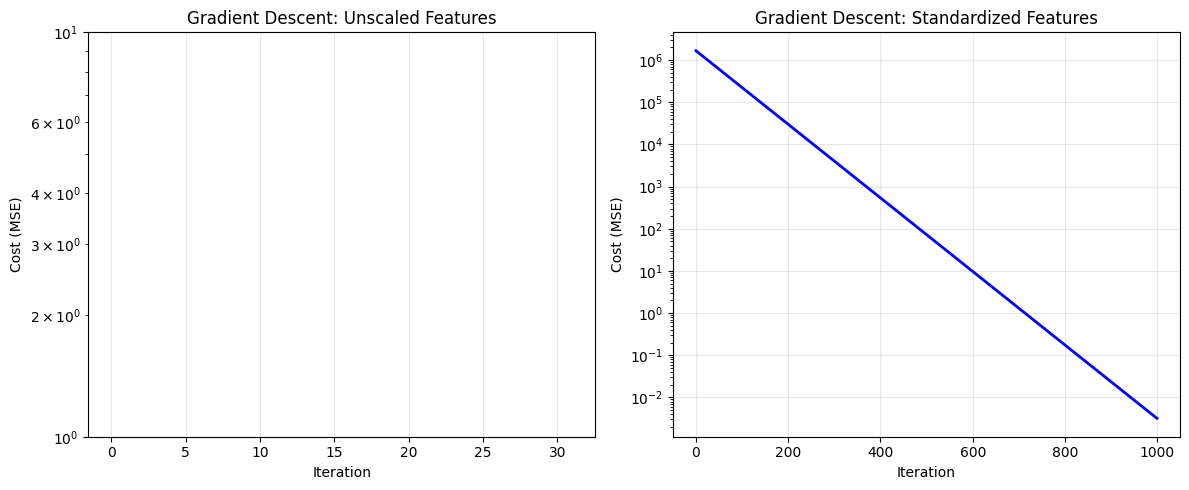

In [49]:
def gradientDescent(X, y, alpha=0.01, iterations=1000, random_seed=42):
    np.random.seed(random_seed)
    m, n = X.shape
    theta = np.random.randn(n, 1) * 0.01  # Small random initialization
    costs = []

    for i in range(iterations):
        predictions = X @ theta
        error = predictions - y

        cost = (1/(2*m)) * np.sum(error**2)
        costs.append(cost)

        gradient = (1/m) * X.T @ error

        theta = theta - alpha * gradient

        # Optional: Print progress every 100 iterations
        if i % 200 == 0:
            print(f"Iteration {i}: Cost = {cost:.2f}")

    return theta, costs

xUnscaledWoIntercept = xUnscaled.copy()
xUnscaledGd = np.column_stack([np.ones(len(xUnscaledWoIntercept)), xUnscaledWoIntercept])

xStdGd = np.column_stack([np.ones(len(xStandardized)), xStandardized])

print("\nRunning Gradient Descent on UNSCALED features...")
thetaUnscaledGd, costsUnscaled = gradientDescent(xUnscaledGd, y, alpha=0.01, iterations=1000)

print("\nRunning Gradient Descent on STANDARDIZED features...")
thetaStdGd, costsStd = gradientDescent(xStdGd, y, alpha=0.01, iterations=1000)

print("\n" + "-"*40)
print("Comparison of Final Coefficients:")
print("-"*40)
print("Feature      | Unscaled GD   | Standardized GD")
print("-"*40)
print(f"Intercept    | {thetaUnscaledGd[0][0]:12.4f} | {thetaStdGd[0][0]:12.4f}")
for i, name in enumerate(featureNames):
    print(f"{name:12} | {thetaUnscaledGd[i+1][0]:12.4f} | {thetaStdGd[i+1][0]:12.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(costsUnscaled, 'r-', linewidth=2)
plt.title('Gradient Descent: Unscaled Features')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(costsStd, 'b-', linewidth=2)
plt.title('Gradient Descent: Standardized Features')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.tight_layout()
plt.show()

##### Question 5f)
<b> Critical rule: explain why you must "fir the scaler on traning data only, then apply to test data" what could go wrong if you scale using test data statistics? </b>

I had a nice day

### Question 6 (Regularization: Ridge, Lasso, and feature Selection)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error



np.random.seed(42)
n, p = 100, 30
X = np.random.randn(n, p)
trueBeta = np.zeros(p)
trueBeta[:5] = [8, -5, 3, -2, 4]
y = X @ trueBeta + (np.random.randn(n)*2)
print(len(X))
print(len(y))
print(X.shape)
print(y.shape)


#Ordinary least squares
print("Here is ordinary least squares:")
xIntercept = np.column_stack([np.ones(len(X)), X])
thetaOLS = np.linalg.inv(xIntercept.T @ xIntercept) @ (xIntercept.T @ y)
print(thetaOLS[1:])
closeToZero = np.sum(np.abs(thetaOLS[1:]) < 0.5)
display(Latex(rf"Number of coefficients with |$\theta$| < {0.5}: {closeToZero}/{p}"))


for i in range(len(trueBeta)-3):
    true_val = trueBeta[i]
    estimated = thetaOLS[1:][i]
    print(f"Feature {i+1}: True = {true_val:6.2f}, OLS = {estimated:6.4f}, Diff = {abs(true_val-estimated):.4f}")

#DIVIDING AT 50% BECAUSE I CAN
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.5, random_state=42)


XTrainIntercept = np.column_stack([np.ones(XTrain.shape[0]), XTrain])
theta_train = np.linalg.inv(XTrainIntercept.T @ XTrainIntercept) @ (XTrainIntercept.T @ yTrain)

def calculateMSE(X, y, theta):

    y = y.flatten() if len(y.shape) > 1 else y

    X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])
    predictions = X_with_intercept @ theta

    predictions = predictions.flatten()

    mse = np.mean((predictions - y) ** 2)
    return mse

trainMSE = calculateMSE(XTrain, yTrain, theta_train)
testMSE = calculateMSE(XTrain, yTest, theta_train)

if testMSE < trainMSE * 1.5:
    print("Defently could be overfitting")
else:
    print("No good evidence of overfitting")

display(Latex(rf"Task 6e"))
display(Latex(rf"HERE COMES ridge regression"))

#https://www.geeksforgeeks.org/machine-learning/implementation-of-ridge-regression-from-scratch-using-python/


100
100
(100, 30)
(100,)
Here is ordinary least squares:
[ 7.61870067 -4.96545159  3.15342211 -2.29757236  4.1879207   0.24190313
  0.22785035  0.21397652 -0.02888767 -0.10031932  0.48595953  0.12826518
  0.13151109  0.11666705 -0.40653136  0.06916767 -0.08763744 -0.31027022
  0.05361125  0.19050567 -0.4302788   0.40116011 -0.1747612   0.74828148
 -0.07842326 -0.08749414  0.16794607 -0.31756487 -0.02735233  0.37536947]


<IPython.core.display.Latex object>

Feature 1: True =   8.00, OLS = 7.6187, Diff = 0.3813
Feature 2: True =  -5.00, OLS = -4.9655, Diff = 0.0345
Feature 3: True =   3.00, OLS = 3.1534, Diff = 0.1534
Feature 4: True =  -2.00, OLS = -2.2976, Diff = 0.2976
Feature 5: True =   4.00, OLS = 4.1879, Diff = 0.1879
Feature 6: True =   0.00, OLS = 0.2419, Diff = 0.2419
Feature 7: True =   0.00, OLS = 0.2279, Diff = 0.2279
Feature 8: True =   0.00, OLS = 0.2140, Diff = 0.2140
Feature 9: True =   0.00, OLS = -0.0289, Diff = 0.0289
Feature 10: True =   0.00, OLS = -0.1003, Diff = 0.1003
Feature 11: True =   0.00, OLS = 0.4860, Diff = 0.4860
Feature 12: True =   0.00, OLS = 0.1283, Diff = 0.1283
Feature 13: True =   0.00, OLS = 0.1315, Diff = 0.1315
Feature 14: True =   0.00, OLS = 0.1167, Diff = 0.1167
Feature 15: True =   0.00, OLS = -0.4065, Diff = 0.4065
Feature 16: True =   0.00, OLS = 0.0692, Diff = 0.0692
Feature 17: True =   0.00, OLS = -0.0876, Diff = 0.0876
Feature 18: True =   0.00, OLS = -0.3103, Diff = 0.3103
Feature 19: 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

##### Question 6e) (RIDGE REGRESSION)
Source used:
https://www.geeksforgeeks.org/machine-learning/implementation-of-ridge-regression-from-scratch-using-python/

$$
J = 1/m \sum_{i=1}^m (y^i-h(x^i))^2
$$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Shape of x and then y:
(100, 30)
(100,)

Model Performance:
MSE: 7.0322
R² Score: 0.9030

Model weights shape: (30,)
Number of non-zero coefficients: 28


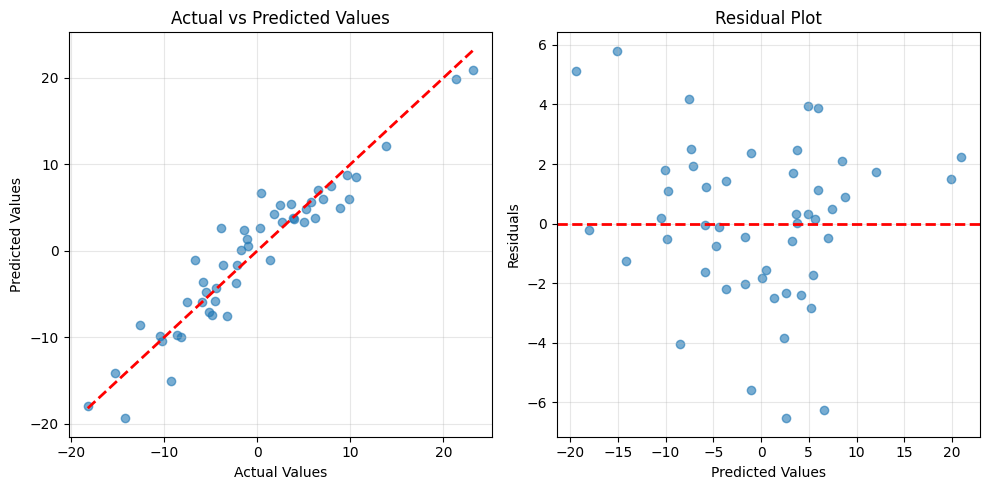

In [37]:
display(Latex(rf"Task 6e"))
display(Latex(rf"HERE COMES ridge regression"))
# Source:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


np.random.seed(42)
n, p = 100, 30
X = np.random.randn(n, p)
trueBeta = np.zeros(p)
trueBeta[:5] = [8, -5, 3, -2, 4]
y = (X @ trueBeta) + (np.random.randn(n) * 2)


class RidgeRegression() :
    def __init__( self, learning_rate, iterations, l2_penality ) :

        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_penality = l2_penality

    def fit( self, X, Y ) :

        self.m, self.n = X.shape
        self.W = np.zeros( self.n )

        self.b = 0
        self.X = X
        self.Y = Y

        for i in range( self.iterations ) :
            self.update_weights()
        return self

    def update_weights( self ) :
        Y_pred = self.predict( self.X )
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +
               ( 2 * self.l2_penality * self.W ) ) / self.m
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return self

    def predict( self, X ) :
        return X.dot( self.W ) + self.b

print("Shape of x and then y:")
print(X.shape)
print(y.shape)

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.5, random_state=0)
model = RidgeRegression(iterations=1000, learning_rate=0.01, l2_penality=1)
model.fit(XTrain, yTrain)
yPred = model.predict(XTest)

mse = mean_squared_error(yTest, yPred)
r2 = r2_score(yTest, yPred)

print(f"MSE: {mse:.4f}")
display(Latex(rf"$R^2$ Score: {r2:.4f}"))
print(f"Model weights shape: {model.W.shape}")
print(f"Number of non-zero coefficients: {np.sum(np.abs(model.W) > 0.01)}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(yTest, yPred, alpha=0.6)
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = yTest - yPred
plt.scatter(yPred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


##### Heavily inspired by

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from plotly.subplots import make_subplots
import plotly.graph_objects as go
lambdas = [0.001, 0.01, 0.1, 1, 10, 100]


np.random.seed(42)
n, p = 100, 30
X = np.random.randn(n, p)
trueBeta = np.zeros(p)
trueBeta[:5] = [8, -5, 3, -2, 4]
y = (X @ trueBeta) + (np.random.randn(n) * 2)


XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=0)
ridge_coefs = []
lasso_coefs = []

for lam in lambdas:
    # Ridge
    ridge = Ridge(alpha=lam, fit_intercept=False)
    ridge.fit(XTrain, yTrain)
    ridge_coefs.append(ridge.coef_)

    lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=10000)
    lasso.fit(XTrain, yTrain)
    lasso_coefs.append(lasso.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

# Plot regularization paths
fig = make_subplots(rows=1, cols=2, subplot_titles=('Ridge (L2) Path', 'Lasso (L1) Path'))

for j in range(p):
    color = 'red' if j < 5 else 'lightgray'
    width = 2 if j < 5 else 0.5
    fig.add_trace(
        go.Scatter(x=np.log10(lambdas), y=ridge_coefs[:, j],
                   mode='lines', line=dict(color=color, width=width),
                   showlegend=False),
        row=1, col=1
    )
for j in range(p):
    color = 'blue' if j < 5 else 'lightgray'
    width = 2 if j < 5 else 0.5
    fig.add_trace(
        go.Scatter(x=np.log10(lambdas), y=lasso_coefs[:, j],
                   mode='lines', line=dict(color=color, width=width),
                   showlegend=False),
        row=1, col=2
    )

fig.update_layout(height=400, width=900,
                  title_text='Regularization Paths (Red/Blue = True Non-Zero)')
fig.update_xaxes(title_text='log_{10}(\mu)', row=1, col=1)
fig.update_xaxes(title_text='log_{10}(\mu)', row=1, col=2)
fig.update_yaxes(title_text='Coefficient', row=1, col=1)
fig.update_yaxes(title_text='Coefficient', row=1, col=2)
fig.show()


print("\nRIDGE (L2):")
for i, lam in enumerate(lambdas):
    max_coef = np.max(np.abs(ridge_coefs[i]))
    print(f"  \mu={lam:6.3f}: Max |coef| = {max_coef:.4f}")

print("\nLASSO (L1):")
for i, lam in enumerate(lambdas):
    n_zero = np.sum(lasso_coefs[i] == 0)
    print(f"  \mu={lam:6.3f}: {n_zero} coefficients exactly zero")



from sklearn.model_selection import GridSearchCV

# Extended lambda range for CV
lambdas_cv = np.logspace(-3, 2, 50)

ridge_cv = GridSearchCV(
    Ridge(fit_intercept=False),
    {'alpha': lambdas_cv},
    cv=5,
    scoring='neg_mean_squared_error'
)
ridge_cv.fit(XTrain, yTrain)

# Lasso CV
lasso_cv = GridSearchCV(
    Lasso(fit_intercept=False, max_iter=10000),
    {'alpha': lambdas_cv},
    cv=5,
    scoring='neg_mean_squared_error'
)
lasso_cv.fit(XTrain, yTrain)




RIDGE (L2):
  λ= 0.001: Max |coef| = 7.5870
  λ= 0.010: Max |coef| = 7.5851
  λ= 0.100: Max |coef| = 7.5654
  λ= 1.000: Max |coef| = 7.3762
  λ=10.000: Max |coef| = 5.9967
  λ=100.000: Max |coef| = 2.4223

LASSO (L1):
  λ= 0.001: 0 coefficients exactly zero
  λ= 0.010: 1 coefficients exactly zero
  λ= 0.100: 10 coefficients exactly zero
  λ= 1.000: 25 coefficients exactly zero
  λ=10.000: 30 coefficients exactly zero
  λ=100.000: 30 coefficients exactly zero


GridSearchCV(cv=5, estimator=Lasso(fit_intercept=False, max_iter=10000),
             param_grid={'alpha': array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-0...
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

### Question 6h and 6i

In [18]:
# Part (h): Geometric visualization of L1 vs L2 constraints

# Create 2D visualization
theta1_range = np.linspace(-3, 3, 200)
theta2_range = np.linspace(-3, 3, 200)
T1, T2 = np.meshgrid(theta1_range, theta2_range)
ols_center = (2, 1.5)
Z_ols = (T1 - ols_center[0])**2 + 0.5*(T2 - ols_center[1])**2

C = 1.5
theta_circle = np.linspace(0, 2*np.pi, 100)
circle_x = C * np.cos(theta_circle)
circle_y = C * np.sin(theta_circle)

# L1 constraint (diamond)
diamond_x = [C, 0, -C, 0, C]
diamond_y = [0, C, 0, -C, 0]

fig = go.Figure()

fig.add_trace(go.Contour(
    x=theta1_range, y=theta2_range, z=Z_ols,
    contours=dict(start=0.5, end=5, size=0.5),
    colorscale='Greys', showscale=False, opacity=0.5,
    name='OLS Loss'
))

fig.add_trace(go.Scatter(
    x=circle_x, y=circle_y, mode='lines',
    line=dict(color='blue', width=3),
    name='L2 (Ridge)'
))

fig.add_trace(go.Scatter(
    x=diamond_x, y=diamond_y, mode='lines',
    line=dict(color='red', width=3),
    name='L1 (Lasso)'
))

# OLS solution
fig.add_trace(go.Scatter(
    x=[ols_center[0]], y=[ols_center[1]], mode='markers',
    marker=dict(size=15, color='black', symbol='star'),
    name='OLS Solution'
))

ridge_sol = (0.9, 0.7)
fig.add_trace(go.Scatter(
    x=[ridge_sol[0]], y=[ridge_sol[1]], mode='markers',
    marker=dict(size=15, color='blue', symbol='circle'),
    name='Ridge Solution'
))

lasso_sol = (C, 0)
fig.add_trace(go.Scatter(
    x=[lasso_sol[0]], y=[lasso_sol[1]], mode='markers',
    marker=dict(size=15, color='red', symbol='diamond'),
    name='Lasso Solution'
))

fig.update_layout(
    title='Geometric Interpretation: Why Lasso Gives Sparse Solutions',
    xaxis_title='θ₁',
    yaxis_title='θ₂',
    height=600, width=600,
    xaxis=dict(range=[-3, 3]),
    yaxis=dict(range=[-3, 3], scaleanchor='x')
)
fig.show()

np.random.seed(123)
X6_corr = X.copy()
X6_corr[:, 5] = X6_corr[:, 0] + np.random.randn(n) * 0.1
# x6 ≈ x1 + small noise

print(f"Correlation(x_1, x_6): ")
print(f"{np.corrcoef(X6_corr[:, 0], X6_corr[:, 5])[0,1]:.4f}")

# Fit Lasso on correlated data
results_corr = []
for seed in range(5):
    np.random.seed(seed)
    idx = np.random.choice(n, n, replace=True)
    X_boot = X6_corr[idx]
    y_boot = y[idx]

    lasso_corr = Lasso(alpha=0.1, fit_intercept=False, max_iter=10000)
    lasso_corr.fit(X_boot, y_boot)
    results_corr.append({
        'seed': seed,
        'θ₁': lasso_corr.coef_[0],
        'θ₆': lasso_corr.coef_[5]
    })

results_df = pd.DataFrame(results_corr)
print("\nLasso coefficients across different bootstrap samples:")
print(results_df.to_string(index=False))



ValueError: operands could not be broadcast together with shapes (100,) (200,) 

### Question 7

672.3955505563115
0      21.953395
1      39.291460
2      10.296502
3       1.184631
4      44.132773
         ...    
195     9.282080
196    14.156871
197    47.575847
198    22.684872
199    35.451946
Name: Age, Length: 200, dtype: float64


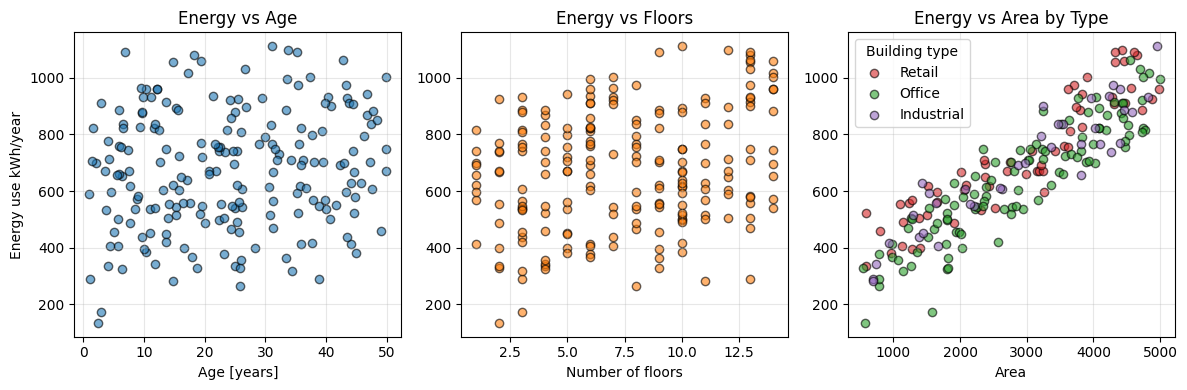

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(2024)
n = 200
area = np.random.uniform(500, 5000, n)
age = np.random.uniform(1, 50, n)
floors = np.random.randint(1, 15, n)
building_type = np.random.choice([ 'Office', 'Retail', 'Industrial'],
                                     n,
                                 p =[0.5 , 0.3 , 0.2])
base_energy = 50 + 0.15*area + 2*age + 15*floors
type_effect = np. where ( building_type == 'Office', 0,
np. where ( building_type == 'Retail', 80, 50) )
energy = base_energy + type_effect + np. random . normal (0, 50, n)
df = pd. DataFrame ({'Area': area,
                    'Age': age,
                    'Floors': floors,
                    'Type': building_type,
                    'Energy': energy })

print(df["Energy"][0])
print(df["Age"])
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(df["Age"], df["Energy"], alpha=0.6, c="tab:blue", edgecolor="k")
plt.xlabel("Age [years]")
plt.ylabel("Energy use kWh/year")
plt.title("Energy vs Age")
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 2)
plt.scatter(df["Floors"], df["Energy"], alpha=0.6, c="tab:orange", edgecolor="k")
plt.xlabel("Number of floors")
plt.title("Energy vs Floors")
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 3)
types = df["Type"].unique()

colors = {"Office": "tab:green", "Retail": "tab:red", "Industrial": "tab:purple"}
for t in types:
    mask = df["Type"] == t
    plt.scatter(
        df.loc[mask, "Area"],
        df.loc[mask, "Energy"],
        alpha=0.6,
        c=colors.get(t, "gray"),
        edgecolor="k",
        label=t
    )

plt.xlabel("Area")
plt.title("Energy vs Area by Type")
plt.legend(title="Building type")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

dfModel = df.copy()
# DUMMY VARIABLES:
dfModel['DRetail'] = (dfModel['Type'] == 'Retail').astype(int)
dfModel['DIndustrial'] = (dfModel['Type'] == 'Industrial').astype(int)
dfModel['AgeXRetail'] = dfModel['Age'] * dfModel['DRetail']
dfModel['AgeXIndustrial'] = dfModel['Age'] * dfModel['DIndustrial']
yFull = dfModel['Energy'].values

x1 = sm.add_constant(dfModel[['Area']])
x2 = sm.add_constant(dfModel[['Area', 'Age', 'Floors']])
x3 = sm.add_constant(dfModel[['Area', 'Age', 'Floors', 'DRetail', 'DIndustrial']])
x4 = sm.add_constant(dfModel[['Area', 'Age', 'Floors', 'DRetail', 'DIndustrial', 'AgeXRetail', 'AgeXIndustrial']])

model1 = sm.OLS(yFull, x1).fit()
model2 = sm.OLS(yFull, x2).fit()
model3 = sm.OLS(yFull, x3).fit()
model4 = sm.OLS(yFull, x4).fit()

models = [model1, model2, model3, model4]
names = ['Area only', 'Area+Age+Floors', 'With Type Dummies', 'With Interactions']

resultsTable = []
for name, model in zip(names, models):
    rmse = np.sqrt(model.mse_resid)
    resultsTable.append({
        'Model': name,
        'R^2': f"{model.rsquared:.3f}",
        'Adj R^2': f"{model.rsquared_adj:.3f}",
        'RMSE': f"{rmse:.3f}"
    })

print(pd.DataFrame(resultsTable).to_string(index=False))

            Model   R^2 Adj R^2   RMSE
        Area only 0.807   0.806 92.211
  Area+Age+Floors 0.917   0.916 60.681
With Type Dummies 0.945   0.944 49.524
With Interactions 0.945   0.943 49.760


##### Problem 7 c, d, e

In [41]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats

xReg = dfModel[['Area', 'Age', 'Floors', 'DRetail', 'DIndustrial']].values

xTrainReg, xTestReg, yTrainReg, yTestReg = train_test_split(
    xReg, yFull, test_size=0.2, random_state=42
)

scalerReg = StandardScaler()
xTrainScaled = xTrainReg.copy().astype(float)
xTestScaled = xTestReg.copy().astype(float)
xTrainScaled[:, :3] = scalerReg.fit_transform(xTrainReg[:, :3])
xTestScaled[:, :3] = scalerReg.transform(xTestReg[:, :3])

alphas = np.logspace(-2, 2, 50)

ridgeCvFull = GridSearchCV(Ridge(), {'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
ridgeCvFull.fit(xTrainScaled, yTrainReg)

lassoCvFull = GridSearchCV(Lasso(max_iter=10000), {'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
lassoCvFull.fit(xTrainScaled, yTrainReg)

olsFull = LinearRegression().fit(xTrainScaled, yTrainReg)

## Part D)
bestModel = model3
fittedValues = bestModel.fittedvalues
residualsDiag = bestModel.resid

fig = make_subplots(rows=2, cols=2,
                   subplot_titles=('Residuals vs Fitted', 'Q-Q Plot',
                                  'Residual Histogram', 'Scale-Location'))

fig.add_trace(
    go.Scatter(x=fittedValues, y=residualsDiag, mode='markers',
               marker=dict(size=5, opacity=0.6)),
    row=1, col=1
)
fig.add_hline(y=0, line_dash='dash', line_color='red', row=1, col=1)

sortedResiduals = np.sort(residualsDiag)
theoreticalQuantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(residualsDiag)))
fig.add_trace(
    go.Scatter(x=theoreticalQuantiles, y=sortedResiduals, mode='markers',
               marker=dict(size=5)),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=[-3, 3], y=[-3*np.std(residualsDiag), 3*np.std(residualsDiag)],
               mode='lines', line=dict(dash='dash', color='red')),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=residualsDiag, nbinsx=30),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=fittedValues, y=np.sqrt(np.abs(residualsDiag)), mode='markers',
               marker=dict(size=5, opacity=0.6)),
    row=2, col=2
)

fig.update_layout(height=600, width=800, title_text='Model Diagnostics', showlegend=False)
fig.show()

print("DIAGNOSTIC TESTS:")
_, pNormal = stats.shapiro(residualsDiag[:50])
print(f"Normality (Shapiro-Wilk): p = {pNormal:.4f}")

print("Heteroscedasticity: Check Scale-Location plot for patterns")

## Part F
def predictEnergy(area, age, floors, buildingType, model=model3):
    dRetail = 1 if buildingType == 'Retail' else 0
    dIndustrial = 1 if buildingType == 'Industrial' else 0

    xNew = np.array([[1, area, age, floors, dRetail, dIndustrial]])
    yPred = model.predict(xNew)[0]
    residualStd = np.sqrt(model.mse_resid)
    tValue = stats.t.ppf(0.975, model.df_resid)
    piLower = yPred - tValue * residualStd
    piUpper = yPred + tValue * residualStd

    return {
        'Point Prediction': round(yPred, 2),
        '95% PI Lower': round(piLower, 2),
        '95% PI Upper': round(piUpper, 2),
        'Unit': 'MWh/year'
    }

print("PREDICTION TOOL TEST")
print("="*60)
prediction = predictEnergy(2000, 10, 5, 'Office')
print("\nPrediction Results:")
for key, value in prediction.items():
    print(f"  {key}: {value}")

DIAGNOSTIC TESTS:
Normality (Shapiro-Wilk): p = 0.2585
Heteroscedasticity: Check Scale-Location plot for patterns
PREDICTION TOOL TEST

Prediction Results:
  Point Prediction: 438.84
  95% PI Lower: 341.17
  95% PI Upper: 536.52
  Unit: MWh/year
